<h1>MobileNets

<h2>(Very small and efficient neural network...)

<b>VGG 16   </b> 553MB<br>
<b>MobileNet</b> 17MB

In [34]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from prettytable import PrettyTable
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Number of GPUs available : ',len(physical_devices))

Number of GPUs available :  0


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [29]:
def prepare_image(file):
    img_path = 'MobileNet_data/'
    img = image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [47]:
import IPython
def makePrettyTable(table_col1, table_col2):
    table = PrettyTable()
    table.add_column("Animal Name", table_col1)
    table.add_column("Prediction Level", table_col2)
    return table
def print_img(n):
    string = str(n) + '.jpg'
    img = mpimg.imread('MobileNet_data/'+string)
    imgplot = plt.imshow(img)
    plt.show()
def top5_results(n):
    string = str(n) + '.jpg'
    preprocessed_image = prepare_image(string)
    predictions = mobile.predict(preprocessed_image)
    results = imagenet_utils.decode_predictions(predictions)
    l1 = []
    l2 = []
    for i in range(5):
        l1.append(results[0][i][1]) 
        l2.append(results[0][i][2])
    table = makePrettyTable(l1,l2)
    print(table)

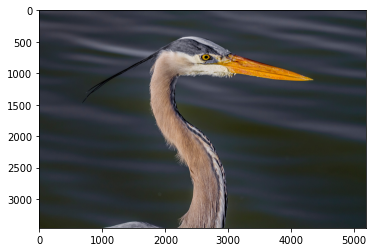

+-------------------+------------------+
|    Animal Name    | Prediction Level |
+-------------------+------------------+
|   American_egret  |    0.9454973     |
| little_blue_heron |   0.022133881    |
|     black_swan    |   0.013597304    |
|      flamingo     |   0.0073495293   |
|      ostrich      |   0.004165418    |
+-------------------+------------------+


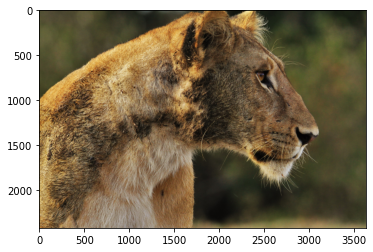

+-------------+------------------+
| Animal Name | Prediction Level |
+-------------+------------------+
|     lion    |    0.99467576    |
|   macaque   |   0.0017349909   |
|    cougar   |   0.0014111348   |
|   wallaby   |   0.0008207413   |
|     lynx    |   0.0004575761   |
+-------------+------------------+


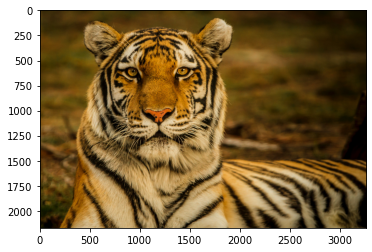

+-------------+------------------+
| Animal Name | Prediction Level |
+-------------+------------------+
|    tiger    |    0.8472087     |
|  tiger_cat  |    0.12658954    |
|    jaguar   |   0.019470464    |
|    zebra    |   0.0041530468   |
|   leopard   |   0.002453017    |
+-------------+------------------+


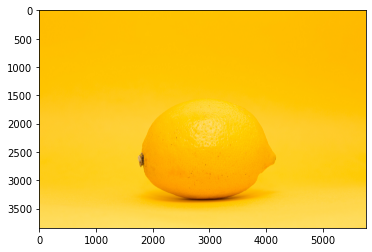

+----------------+------------------+
|  Animal Name   | Prediction Level |
+----------------+------------------+
|     orange     |    0.6149336     |
|     lemon      |    0.38020328    |
|     banana     |   0.0018846105   |
| ping-pong_ball |   0.0015860283   |
| rubber_eraser  |  0.00029547678   |
+----------------+------------------+


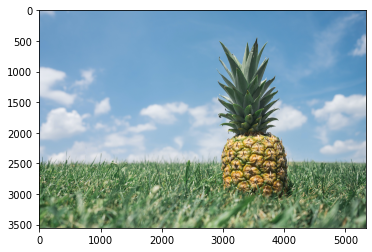

+-------------+------------------+
| Animal Name | Prediction Level |
+-------------+------------------+
|  pineapple  |    0.58070344    |
|   rapeseed  |    0.27825597    |
|     ear     |    0.09245381    |
|     corn    |   0.018942384    |
|     hay     |   0.004446717    |
+-------------+------------------+


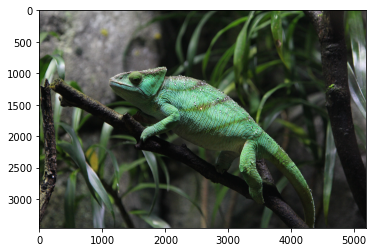

+--------------------+------------------+
|    Animal Name     | Prediction Level |
+--------------------+------------------+
| African_chameleon  |     0.869736     |
|    green_lizard    |    0.12345153    |
| American_chameleon |   0.0035545072   |
|   common_iguana    |   0.0027867577   |
|       agama        |  0.00025162706   |
+--------------------+------------------+


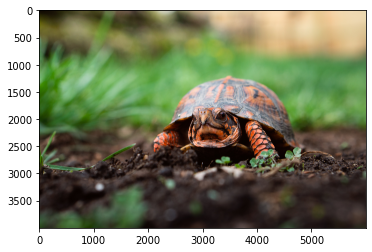

+-------------+------------------+
| Animal Name | Prediction Level |
+-------------+------------------+
|  box_turtle |     0.971039     |
| hermit_crab |   0.011511979    |
|  mud_turtle |    0.01094886    |
|   terrapin  |   0.003911979    |
|    cicada   |   0.000856815    |
+-------------+------------------+


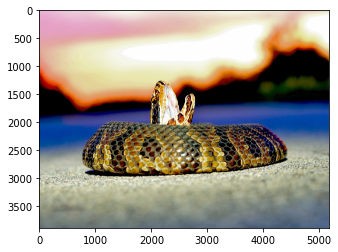

+--------------+------------------+
| Animal Name  | Prediction Level |
+--------------+------------------+
| fiddler_crab |    0.39439934    |
| hermit_crab  |    0.1678435     |
|  rock_crab   |   0.055760413    |
|  sidewinder  |   0.039565835    |
| Gila_monster |    0.03174148    |
+--------------+------------------+


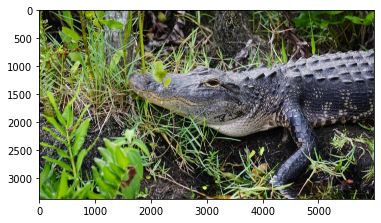

+--------------------+------------------+
|    Animal Name     | Prediction Level |
+--------------------+------------------+
| American_alligator |    0.99880695    |
|   common_iguana    |   0.0008247445   |
| African_crocodile  |  0.00019870618   |
|  alligator_lizard  |  7.9790705e-05   |
| African_chameleon  |  2.5317817e-05   |
+--------------------+------------------+


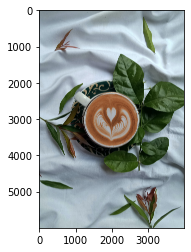

+--------------+------------------+
| Animal Name  | Prediction Level |
+--------------+------------------+
|    pillow    |    0.21257226    |
|    packet    |    0.18225184    |
| handkerchief |   0.113463156    |
|  hair_slide  |    0.11267513    |
|  earthstar   |   0.069032386    |
+--------------+------------------+


In [50]:
for i in range(1,11):
    print_img(i)
    top5_results(i)